# GMIT 52465 Programming for Data Analysis - Project

## Mark Kelly 14/12/2018



## Problem statement 

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.

Speciﬁcally, in this project you should: 

• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four diﬀerent variables. 

• Investigate the types of variables involved, their likely distributions, and their relationships with each other. • Synthesise/simulate a data set as closely matching their properties as possible. 

• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook. 

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own ﬁles. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set. 


## Real World phenomenon

I recently put my car through the NCT and it got me thinking about overall pass/failure rates and what are the main issues experienced during the test. This information can be retrieved from the Data.Gov.ie website. 

https://data.gov.ie/dataset/2016-make-model-year-failures-at-nct

A dataset regarding NCT Failure rates during 2016 has been created by the Raod Safety Authority. This contains each car manufacture/ model and car year and the results of it's test and if it failed, why. For this project, I am going to simulate this dataset.

The test is broken up into 14 categories. These are listed below. 
A quick initial analysis of the data was conducted along with the actual total number of fails and the percentage of fails for tests completed in 2016.



|	                     		|Total Fails|   %|
|-------------------------------|-----------|----|
|Lighting and Electrical		|294683		|20.11|
|Steering and Suspension		|225581		|15.39|
|Wheels and Tyres			    |203970		|13.92|
|Brake Test			            |175342		|11.96|
|Vehicle and Safety Equipment	|152620		|10.41|
|Braking Equipment		    |137434		|9.38|
|Light test			        |102179		|6.97|
|Engine, Noise and Exhaust	|87815		|5.99|
|Emmissions			        |80061		|5.46|
|Chassis and Body			    |9826		|5.45|
|Suspension Test			    |78966		|5.39|
|OTHER				        |6623		|0.45|
|Incompletable			    |1072		|0.07|
|-------------------------------------------|--------------|-------|
|Sum of PASS				            |702779		|47.95|
|Sum of FAIL				            |762931		|52.05|
|Sum of Total				        |1465710|	|

Each car manufacturer and model is listed for each year of manufacture of every car that was tested in 2016. This has resulted in 8165 unique categories which is too many for a simulated dataset. With this simulation, I will only list the top 15 of car manufacturers in terms of cars tested (accounted for 85% of all tests in 2016) and not the model types. Also, the year of the car manufacture or 'birth' is limited to the year 2000 to 2016. 



Here I am listing the manufacturers and years along with the usual function declarations.

In [256]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.mode.chained_assignment = None #This is remove a warning that pops up when creating the 'Fail' and ' Pass' columns.


make=["Audi","BMW","Ford","Opel","Skoda","Nissan", "Volkswagen", "Hyundai", "Toyota", "Honda", "Peugeot", "Mazda", "Mercedes Benz", "Renault","Citroen"]
year=["2016","2015", "2014","2013","2012","2011","2010","2009","2008","2007","2006","2005","2004","2003","2002","2001","2000",]


I found it more straightforward to create one of the fail columns first. The random function I am using is the binomial function. The result is either a Pass or a Fail (1 or 0). The probability of failing due to a Lighting or Electrical Failure is 20% in the NCT results so this was replicated using the value 0.2 in the binomial function. This will result in 10,000 values for this column created in a dataframe called 'df'.

In [257]:
df = pd.DataFrame(np.random.binomial(1, 0.2, 10000), columns=["Lighting and Electrical Fails"])

To match up this dataframe with a manufacturer, an array is created called 'makelist' with 10000 null values. 
This array is populated with a random value from the manufacturer list and then added into the dataframe into a column called 'Manufacturer'.

In [258]:
i=0
makelist = [None]*10000

for i in range(len(df)):
    makelist[i] = random.choice(make)

se = pd.Series(makelist)
df['Manufacturer'] = se.values
df

,Lighting and Electrical Fails,Manufacturer
0,0,Hyundai
1,0,Opel
2,0,Audi
3,1,Ford
4,0,Toyota
5,0,Hyundai
6,0,Hyundai
7,0,Opel
8,0,Skoda
9,0,Hyundai


Using the same method the dataframe has a 'Year' column created and a randomly assigned year from the list.

In [261]:
yearlist = [None]*10000

for i in range(len(df)):
    yearlist[i] = random.choice(year)
    
se2 = pd.Series(yearlist)
df['Year'] = se2.values

In [262]:
df

,Lighting and Electrical Fails,Manufacturer,Year
0,0,Hyundai,2004
1,0,Opel,2003
2,0,Audi,2002
3,1,Ford,2016
4,0,Toyota,2003
5,0,Hyundai,2015
6,0,Hyundai,2000
7,0,Opel,2009
8,0,Skoda,2010
9,0,Hyundai,2010


In [263]:
df['Steering and Suspension Fails'] = np.random.binomial(1, 0.15, 10000)
df['Wheels and Tyres Fails'] = np.random.binomial(1, 0.14, 10000)
df['Brake Test Fails'] = np.random.binomial(1, 0.12, 10000)
df['Side Slip Test Fails'] = np.random.binomial(1, 0.115, 10000)
df['Vehicle and Safety Equipment Fails'] = np.random.binomial(1, 0.104, 10000)
df['Braking Equipment Fails'] = np.random.binomial(1, 0.093, 10000)
df['Light Test Fails'] = np.random.binomial(1, 0.069, 10000)
df['Engine, Noise and Exhaust Fails'] = np.random.binomial(1, 0.059, 10000)
df['Emmissions Fails'] = np.random.binomial(1, 0.054, 10000)
df['Chassis and Body Fails'] = np.random.binomial(1, 0.054, 10000)
df['Suspension Test Fails'] = np.random.binomial(1, 0.053, 10000)
df['OTHER Fails'] = np.random.binomial(1, 0.0045, 10000)
df['Incompletable Fails'] = np.random.binomial(1, 0.0007, 10000)

In [264]:
df

,Lighting and Electrical Fails,Manufacturer,Year,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails
0,0,Hyundai,2004,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Opel,2003,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,Audi,2002,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Ford,2016,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,Toyota,2003,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,Hyundai,2015,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,Hyundai,2000,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,Opel,2009,0,1,0,0,0,0,0,0,0,0,0,0,0
8,0,Skoda,2010,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,Hyundai,2010,1,0,0,1,0,0,0,0,0,1,0,0,0


In [265]:
df = df[['Manufacturer', 'Year', 'Lighting and Electrical Fails', 'Steering and Suspension Fails', 'Wheels and Tyres Fails', 'Brake Test Fails', 'Side Slip Test Fails', 'Vehicle and Safety Equipment Fails', 'Braking Equipment Fails', 'Light Test Fails', 'Engine, Noise and Exhaust Fails', 'Emmissions Fails', 'Chassis and Body Fails', 'Suspension Test Fails', 'OTHER Fails', 'Incompletable Fails']]

In [266]:
df

,Manufacturer,Year,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails
0,Hyundai,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Opel,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Audi,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ford,2016,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Toyota,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Hyundai,2015,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,Hyundai,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Opel,2009,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8,Skoda,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Hyundai,2010,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [267]:
df.describe()

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.201300,0.148400,0.137300,0.123100,0.111700,0.103000,0.092200,0.068200,0.060500,0.052900,0.055300,0.051400,0.00440,0.000500
std,0.400992,0.355514,0.344181,0.328568,0.315013,0.303974,0.289323,0.252101,0.238423,0.223845,0.228576,0.220823,0.06619,0.022356
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


Text(0.5,1,'Total Number of Category Fails')

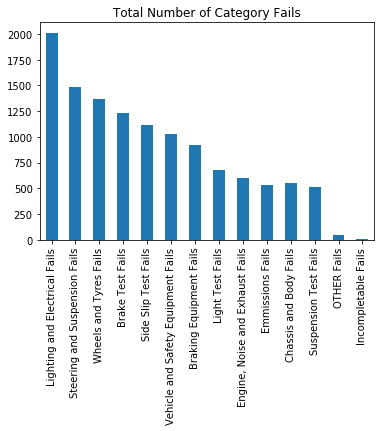

In [268]:
df.iloc[:, 2:16].sum().plot.bar()
plt.title('Total Number of Category Fails')

In [269]:
df.iloc[:, 2:14].sum(1)

0       0
1       0
2       0
3       2
4       0
5       1
6       0
7       1
8       0
9       3
10      3
11      2
12      1
13      1
14      1
15      0
16      1
17      3
18      1
19      2
20      4
21      0
22      2
23      2
24      1
25      0
26      3
27      1
28      1
29      1
       ..
9970    0
9971    1
9972    1
9973    0
9974    2
9975    2
9976    0
9977    2
9978    1
9979    0
9980    2
9981    0
9982    0
9983    1
9984    1
9985    0
9986    2
9987    1
9988    1
9989    2
9990    1
9991    1
9992    0
9993    3
9994    1
9995    1
9996    2
9997    0
9998    1
9999    2
Length: 10000, dtype: int64

In [270]:
df['Fail'] = np.where(df.iloc[:, 2:14].sum(1) > 0, 1, 0)

In [271]:
df['Pass'] = np.where(df.iloc[:, 2:14].sum(1) == 0, 1, 0)

In [272]:
df

,Manufacturer,Year,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass
0,Hyundai,2004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Opel,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Audi,2002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Ford,2016,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Toyota,2003,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,Hyundai,2015,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6,Hyundai,2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,Opel,2009,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
8,Skoda,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,Hyundai,2010,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0


In [273]:
df.groupby(['Manufacturer']).sum()

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass
Manufacturer,,,,,,,,,,,,,,,,
Audi,176,123,115,109,105,78,80,61,45,37,53,27,2,0,595,231
BMW,170,120,121,88,100,61,72,62,44,52,41,48,7,0,578,240
Ford,151,121,113,108,101,103,91,70,41,40,55,56,4,0,621,230
Honda,154,109,105,100,92,97,59,69,50,44,43,44,4,0,572,234
Hyundai,173,124,116,110,82,87,80,54,60,53,52,45,0,0,611,217
Kia,162,123,104,107,92,97,68,63,44,38,46,47,4,0,590,246
Nissan,182,132,108,79,102,68,88,53,59,49,40,45,6,1,608,227
Opel,174,120,115,99,96,88,65,47,55,42,53,42,4,1,589,233
Peugeot,153,130,134,107,92,88,73,58,59,44,46,44,2,2,611,248


In [274]:
df.groupby(['Year']).sum()

,Lighting and Electrical Fails,Steering and Suspension Fails,Wheels and Tyres Fails,Brake Test Fails,Side Slip Test Fails,Vehicle and Safety Equipment Fails,Braking Equipment Fails,Light Test Fails,"Engine, Noise and Exhaust Fails",Emmissions Fails,Chassis and Body Fails,Suspension Test Fails,OTHER Fails,Incompletable Fails,Fail,Pass
Year,,,,,,,,,,,,,,,,
2000,128,96,84,83,82,58,58,43,44,22,35,31,2,0,436,161
2001,117,87,77,85,73,53,57,33,46,30,39,24,4,0,427,179
2002,121,91,89,72,68,63,55,43,34,28,33,34,2,0,455,158
2003,124,77,89,81,55,56,45,44,46,27,36,28,4,0,427,161
2004,129,102,81,64,68,54,57,39,48,25,32,23,5,1,422,174
2005,131,73,77,63,66,62,58,42,33,42,32,32,4,0,419,167
2006,91,80,70,66,54,52,51,32,27,33,25,27,0,0,374,159
2007,104,87,79,65,64,48,53,42,30,34,21,32,3,0,408,159
2008,109,101,72,68,60,70,56,35,28,31,27,20,2,1,404,161


In [275]:
df.groupby(['Manufacturer','Year']).sum()

Lighting and Electrical Fails  \
Manufacturer Year                                  
Audi         2000                             12   
             2001                             13   
             2002                              8   
             2003                             11   
             2004                             12   
             2005                             13   
             2006                             13   
             2007                             15   
             2008                             11   
             2009                              5   
             2010                              7   
             2011                              6   
             2012                              8   
             2013                             11   
             2014                             13   
             2015                              5   
             2016                             13   
BMW          2000                             11   
             2001                              7   
             2002                              6   
             2003                             17   
             2004                             11   
             2005                             10   
             2006                              6   
             2007                              4   
             2008                              6   
             2009                             15   
             2010                              9   
             2011                              7   
             2012                             13   
...                                          ...   
Toyota       2004                             10   
             2005                             12   
             2006                              3   
             2007                              7   
             2008                              9   
             2009                             15   
             2010                              8   
             2011                             12   
             2012                             10   
             2013                             11   
             2014                             18   
             2015                              7   
             2016                             11   
Volkswagen   2000                             12   
             2001                             14   
             2002                              6   
             2003                              6   
             2004                             13   
             2005                             11   
             2006                              9   
             2007                              8   
             2008                              6   
             2009                             10   
             2010                              9   
             2011                              8   
             2012                             14   
             2013                              9   
             2014                              8   
             2015                              7   
             2016                             21   

                   Steering and Suspension Fails  Wheels and Tyres Fails  \
Manufacturer Year                                                          
Audi         2000                              8                       7   
             2001                              6                       8   
             2002                              7                       6   
             2003                              9                      11   
             2004                             15                       8   
             2005                              5                       7   
             2006                              6                       8   
             2007                              9          